<a href="https://colab.research.google.com/github/ttollefson11/IS4487/blob/main/Lab11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Module 5 Script

## Objectives

a. Understand model accuracy.  Why is it a performance metric for classification and not regression?
    
b. Calculate accuracy for a simple majority class model (this is the same as calculating the proportion of the majority class in a binary variable). Consider: x <- c(1, 1, 1, 0, 0).  What is the majority class? What is the proportion of the majority class in x?
    
c. Fit a tree model of the target with just one predictor variable and calculate the accuracy of this model.
    
d. Interpret a tree model, and calculate information gain.
    
e. Fit a tree model of the target using all the predictors, then:  create a visualization of the tree and identify the top 3 most important predictors in this model.
    
f. How do these models compare to majority class prediction?
    
g. How will you use a classification model as part of a solution to the AdviseInvest case?

We will use the MegaTelCo data for this demonstration.

##Load Libraries

In this class we will be using 
- Pandas
- Scikitlearn
- Matplotlib


In [1]:
import pandas as pd
import matplotlib as mpl
import numpy as np

from sklearn.tree import DecisionTreeClassifier, export_graphviz # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree


## Getting data into Pandas


See the Canvas assignments and lectures for a description of the AQI data

**Note:** you will need to enter a code supplied by Google in the next step. 


In [2]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/gdrive/MyDrive/Colab Notebooks/daily_aqi_by_county_2021.csv')

Mounted at /content/gdrive


In [3]:
#look at the top rows
df.head(10) 

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2021-01-01,27,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2021-01-04,47,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2021-01-07,24,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2021-01-10,39,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2021-01-13,46,Good,PM2.5,01-003-0010,1
5,Alabama,Baldwin,1,3,2021-01-16,21,Good,PM2.5,01-003-0010,1
6,Alabama,Baldwin,1,3,2021-01-19,52,Moderate,PM2.5,01-003-0010,1
7,Alabama,Baldwin,1,3,2021-01-22,11,Good,PM2.5,01-003-0010,1
8,Alabama,Baldwin,1,3,2021-01-25,39,Good,PM2.5,01-003-0010,1
9,Alabama,Baldwin,1,3,2021-01-28,22,Good,PM2.5,01-003-0010,1


In [4]:
#look at the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218196 entries, 0 to 218195
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   State Name                 218196 non-null  object
 1   county Name                218196 non-null  object
 2   State Code                 218196 non-null  int64 
 3   County Code                218196 non-null  int64 
 4   Date                       218196 non-null  object
 5   AQI                        218196 non-null  int64 
 6   Category                   218196 non-null  object
 7   Defining Parameter         218196 non-null  object
 8   Defining Site              218196 non-null  object
 9   Number of Sites Reporting  218196 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 16.6+ MB


In [5]:
#describe the data before cleaning it
df.describe()

,State Code,County Code,AQI,Number of Sites Reporting
count,218196.000000,218196.000000,218196.000000,218196.000000
mean,30.178390,82.098265,39.584250,1.924220
std,15.755914,89.555906,21.547055,2.251967
min,1.000000,1.000000,0.000000,1.000000
25%,18.000000,25.000000,29.000000,1.000000
50%,30.000000,61.000000,38.000000,1.000000
75%,42.000000,111.000000,47.000000,2.000000
max,80.000000,810.000000,2723.000000,34.000000


## Clean up the data

Clean up the data in a  new datafram named "df_clean"


In [6]:
#filter rows to only include Utah state
df_ut = df[(df['State Name'] == 'Utah')]

#delete any rows with missing values in the clean dataframe
df_ut = df_ut.dropna() 

df_ut.describe()

,State Code,County Code,AQI,Number of Sites Reporting
count,4179.0,4179.000000,4179.000000,4179.000000
mean,49.0,28.761187,52.640105,1.859775
std,0.0,18.835038,20.771701,1.862547
min,49.0,3.000000,0.000000,1.000000
25%,49.0,11.000000,40.000000,1.000000
50%,49.0,35.000000,47.000000,1.000000
75%,49.0,47.000000,60.000000,2.000000
max,49.0,57.000000,177.000000,8.000000


# Standardize attributes

 - Category

In [7]:
df_ut.loc[df_ut['Category'] == 'Good', 'Category'] = 1
df_ut.loc[df_ut['Category'] == 'Moderate', 'Category'] = 2
df_ut.loc[df_ut['Category'] == 'Unhealthy for Sensitive Groups', 'Category'] = 3
df_ut.loc[df_ut['Category'] == 'Unhealthy', 'Category'] = 4
df_ut.loc[df_ut['Category'] == 'Very Unhealthy', 'Category'] = 5
df_ut.loc[df_ut['Category'] == 'Hazardous', 'Category'] = 6

df_ut.head(10)

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
191057,Utah,Box Elder,49,3,2021-01-01,33,1,Ozone,49-003-7001,1
191058,Utah,Box Elder,49,3,2021-01-02,32,1,Ozone,49-003-7001,1
191059,Utah,Box Elder,49,3,2021-01-03,30,1,Ozone,49-003-7001,1
191060,Utah,Box Elder,49,3,2021-01-04,30,1,Ozone,49-003-7001,1
191061,Utah,Box Elder,49,3,2021-01-05,36,1,Ozone,49-003-7001,1
191062,Utah,Box Elder,49,3,2021-01-06,34,1,Ozone,49-003-7001,1
191063,Utah,Box Elder,49,3,2021-01-07,29,1,Ozone,49-003-7001,1
191064,Utah,Box Elder,49,3,2021-01-08,31,1,Ozone,49-003-7001,1
191065,Utah,Box Elder,49,3,2021-01-09,32,1,Ozone,49-003-7001,1
191066,Utah,Box Elder,49,3,2021-01-10,30,1,Ozone,49-003-7001,1


## Calculate distribution of the outcome  
What is the proportion of the AQI for Salt Lake county?

Why should we care about this proportion?

1. An important step in EDA is to understand the distribution of the target variable.

2. The majority class in the target variable will serve as an important benchmark for model performance. If we used what we'll call a "majority class classifier"---this consists in always predicting the majority class, which in this case is `STAY`---we would be correct 1 - .49 or 51% of the time.  Another way of saying this is that majority class classifier in the MegaTelCo case would result in accuracy of .51.  

Accuracy is defined as the proportion of correctly predicted labels. It is a commonly used error metric for evaluating classifier performance.

Think about why a majority class model in this case would have an accuracy of .51.

Whatever later model we develop should have better accuracy than this performance benchmark.

In [8]:
#Find the mean value
df_ut['Category'].mean()


1.408949509452022

## Fit a full tree model

Use all of the independent attributes.  We'll call this the "full tree." 

What is the accuracy of the full tree? 

In [9]:
# split the datafram into independent (x) and dependent (predicted) attributes (y)
x = df_ut[['State Code', 'County Code', 'AQI', 'Number of Sites Reporting']]
y = df_ut['Category']
y = y.astype('int')

full_tree = DecisionTreeClassifier(criterion="entropy", max_depth=1)

# Create Decision Tree Classifer
full_tree = full_tree.fit(x,y)


##Visualize the full tree

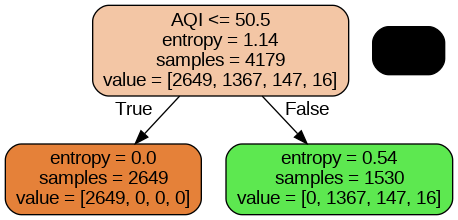

In [10]:
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(full_tree, out_file=dot_data, 
                   feature_names=x.columns, 
                   filled=True,rounded=True, precision =2)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Check Accuracy

In [11]:
pred = full_tree.predict(x)

#print(pred)

print("Accuracy:",metrics.accuracy_score(y, pred))

Accuracy: 0.960995453457765


##Test and Train
Now we will split the dataset into 80% training data and 20% test data

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

##Create a new tree using only training data

In [13]:
train_tree = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Create Decision Tree Classifer
train_tree = train_tree.fit(x_train,y_train)

##Apply the new tree to our test data

In [14]:
pred = train_tree.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred))

Accuracy: 1.0


## Visualize the trained tree

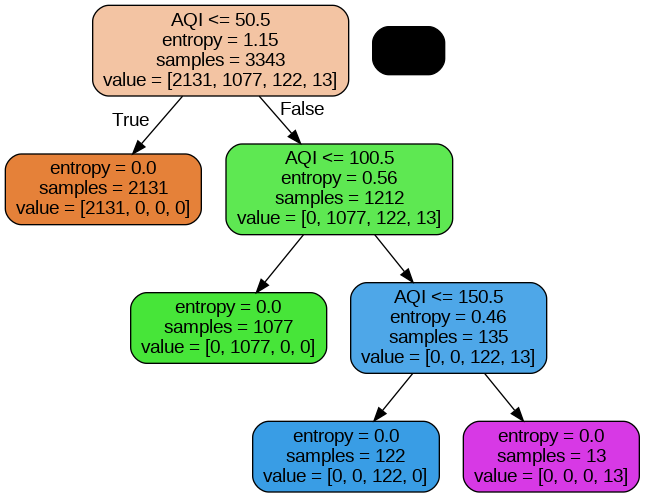

In [15]:
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(train_tree, out_file=dot_data, 
                   feature_names=x.columns, 
                   filled=True,rounded=True, precision =2)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Did the model improve?
👎  👍